In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2

In [2]:
# Configure GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [3]:
print(os.listdir('train'))
print(os.listdir(os.path.join('train','Covid19')))

['Covid19', 'Normal', 'Viral_Pneumonia']
['01.jpeg', '010.png', '012.jpeg', '015.jpg', '019.png', '02.jpeg', '020.jpg', '021.jpeg', '022.jpeg', '024.jpeg', '025.jpeg', '026.jpeg', '027.jpeg', '03.jpeg', '031.jpeg', '032.jpeg', '033.png', '039.jpeg', '04.png', '040.jpeg', '041.jpeg', '042.jpeg', '043.jpeg', '044.jpeg', '045.jpeg', '046.jpeg', '047.jpeg', '048.jpeg', '049.jpeg', '050.jpeg', '051.jpeg', '052.jpeg', '053.jpeg', '054.jpeg', '055.jpeg', '056.jpg', '057.jpeg', '058.jpeg', '059.jpeg', '06.jpeg', '060.jpeg', '061.jpg', '062.jpeg', '064.jpg', '065.jpeg', '067.jpg', '068.jpg', '069.jpg', '07.jpg', '071.jpg', '072.jpeg', '073.jpg', '074.jpg', '076.jpg', '078.jpeg', '079.jpeg', '08.jpeg', '080.jpg', '081.jpeg', '082.jpg', '083.jpeg', '084.jpeg', '085.jpeg', '086.jpg', '088.jpeg', '089.jpg', '09.png', '090.jpeg', '091.jpg', '092.png', 'COVID-00001.jpg', 'COVID-00002.jpg', 'COVID-00003a.jpg', 'COVID-00003b.jpg', 'COVID-00004.jpg', 'COVID-00005.jpg', 'COVID-00006.jpg', 'COVID-00007.jp

In [4]:
data=tf.keras.utils.image_dataset_from_directory('train',image_size=(224,224))

Found 251 files belonging to 3 classes.


In [5]:
data.class_names
# Class 0 = Covid19 , Class 1 = Normal , Class 2 = Viral_Pneumonia

['Covid19', 'Normal', 'Viral_Pneumonia']

In [6]:
data_iterator=data.as_numpy_iterator()

In [7]:
batch=data_iterator.next()

In [8]:
batch[0]

array([[[[1.00000000e+01, 1.00000000e+01, 1.00000000e+01],
         [1.00000000e+01, 1.00000000e+01, 1.00000000e+01],
         [1.40382652e+01, 1.40382652e+01, 1.40382652e+01],
         ...,
         [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
         [1.88877762e+02, 1.88877762e+02, 1.88877762e+02],
         [2.36231112e+00, 2.36231112e+00, 2.36231112e+00]],

        [[1.00000000e+01, 1.00000000e+01, 1.00000000e+01],
         [9.28571415e+00, 9.28571415e+00, 9.28571415e+00],
         [1.30280609e+01, 1.30280609e+01, 1.30280609e+01],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [1.81127151e+02, 1.81127151e+02, 1.81127151e+02],
         [5.17345095e+00, 5.17345095e+00, 5.17345095e+00]],

        [[9.14540768e+00, 9.14540768e+00, 9.14540768e+00],
         [1.12857141e+01, 1.12857141e+01, 1.12857141e+01],
         [1.28571424e+01, 1.28571424e+01, 1.28571424e+01],
         ...,
         [2.53961823e+02, 2.53961823e+02, 2.53961823e+02],
         [

In [9]:
print(len(batch))
print(batch[0].shape)
print(batch[1])

2
(32, 224, 224, 3)
[2 0 1 0 1 1 1 2 2 1 0 2 2 1 0 0 1 0 0 1 0 1 0 1 2 1 2 0 0 0 0 1]


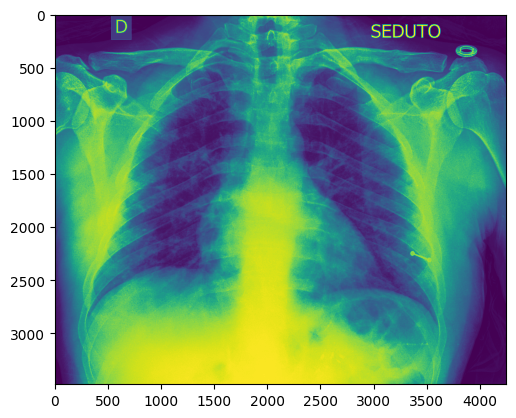

In [10]:
img=cv2.imread(os.path.join('train','Covid19','01.jpeg'))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))

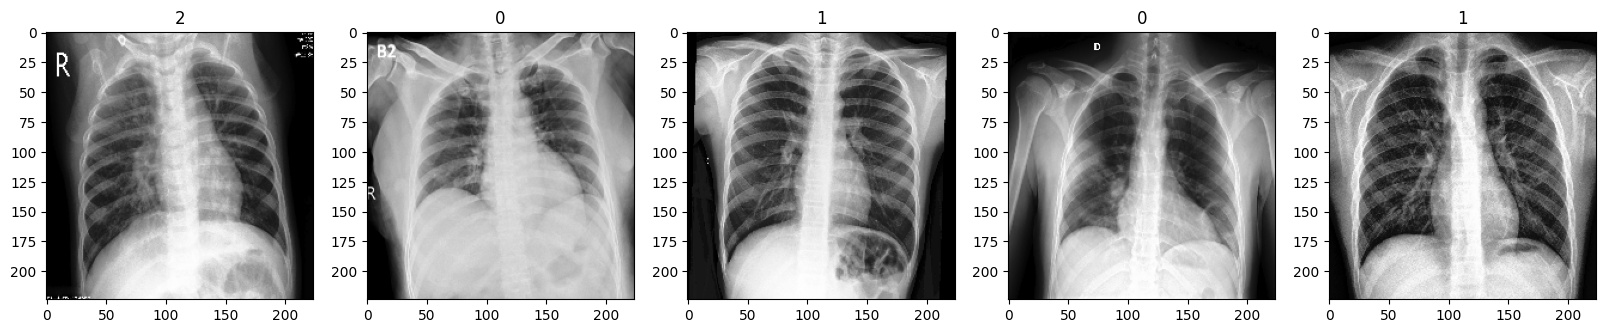

In [11]:
fig, ax=plt.subplots(ncols=5,figsize=(20,20))
for idx,img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [12]:
data=data.map(lambda x,y: (tf.image.rgb_to_grayscale(x)/255,y))

In [13]:
data_iterator=data.as_numpy_iterator()

In [14]:
batch=data_iterator.next()

In [15]:
print(batch[0].min())
print(batch[0].max())

0.0
0.99990004


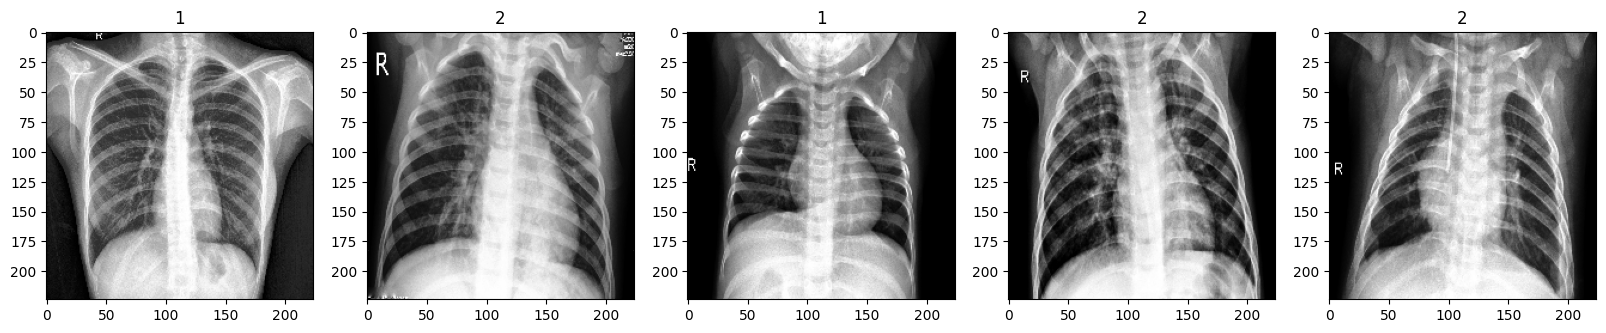

In [16]:
fig, ax=plt.subplots(ncols=5,figsize=(20,20))
for idx,img in enumerate(batch[0][:5]):
    ax[idx].imshow(img,cmap='gray')
    ax[idx].title.set_text(batch[1][idx])

In [17]:
test_data=tf.keras.preprocessing.image_dataset_from_directory('test',image_size=(224,224))
print(test_data.class_names)
test_data=test_data.map(lambda x,y: (tf.image.rgb_to_grayscale(x)/255,y))

Found 66 files belonging to 3 classes.
['Covid19', 'Normal', 'Viral_Pneumonia']


In [18]:
test_data_iterator=test_data.as_numpy_iterator()

In [19]:
test_batch=data_iterator.next()

In [20]:
print(batch[0].min())
print(batch[0].max())

0.0
0.99990004


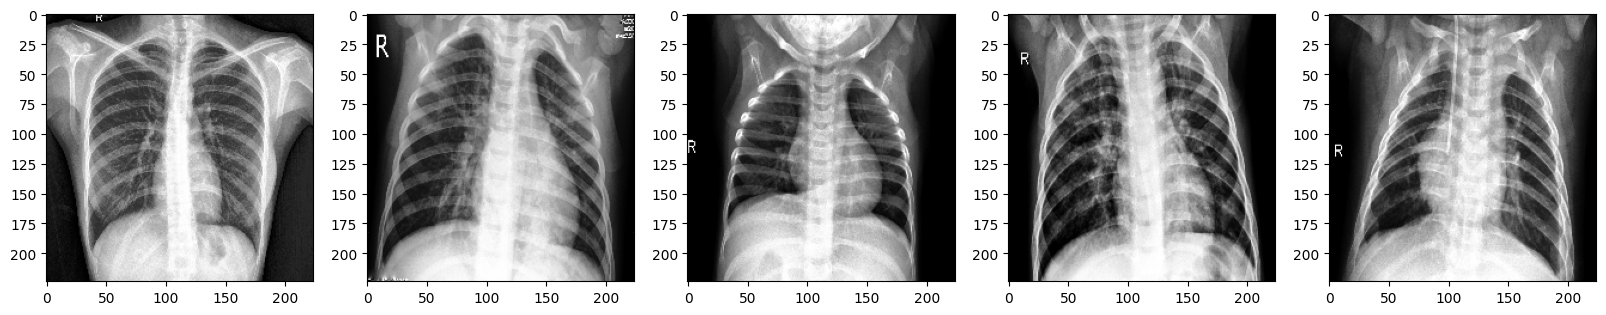

In [21]:
fig, ax=plt.subplots(ncols=5,figsize=(20,20))
for idx,img in enumerate (batch[0][:5]):
    ax[idx].imshow(img,cmap='gray')

In [22]:
print(test_batch[0])
print(test_batch[0].max())
print(test_batch[0].min())

[[[[1.8978195e-01]
   [2.4931477e-01]
   [3.9033711e-01]
   ...
   [1.4003730e-01]
   [1.3202462e-01]
   [1.4245775e-01]]

  [[1.9212765e-01]
   [1.8096930e-01]
   [1.9159250e-01]
   ...
   [1.4231934e-01]
   [1.4053184e-01]
   [1.3835125e-01]]

  [[1.9588375e-01]
   [1.8938683e-01]
   [1.9199263e-01]
   ...
   [1.3780217e-01]
   [1.4320274e-01]
   [1.3626578e-01]]

  ...

  [[7.8457558e-01]
   [7.6911074e-01]
   [7.7515227e-01]
   ...
   [7.2003561e-01]
   [7.4650997e-01]
   [7.3325998e-01]]

  [[7.7527255e-01]
   [7.9312313e-01]
   [7.7133656e-01]
   ...
   [7.2928894e-01]
   [7.4050695e-01]
   [7.3213995e-01]]

  [[7.7527255e-01]
   [7.7975398e-01]
   [7.6799047e-01]
   ...
   [7.3045498e-01]
   [7.3887086e-01]
   [7.3926085e-01]]]


 [[[1.7715316e-02]
   [1.4536392e-02]
   [1.5684707e-02]
   ...
   [2.6986338e-03]
   [2.7728269e-03]
   [3.9211768e-03]]

  [[2.0797959e-02]
   [1.2659893e-02]
   [1.4065470e-02]
   ...
   [1.6192370e-03]
   [1.6192370e-03]
   [8.3867455e-04]]

  [[1.9

In [23]:
len(test_data)

3

In [24]:
len(data)

8

In [25]:
train_size = 6 
val_size = 2
test_size = 3

In [26]:
train = data.take(train_size)
val=data.skip(train_size).take(val_size)
test=test_data

In [27]:
print(len(train))
print(len(val))
print(len(test))

6
2
3


In [28]:
for images, labels in train.take(1):
    print("Image shape:", images.shape)
    print("Image min/max values:", tf.reduce_min(images).numpy(), tf.reduce_max(images).numpy())
    print("Labels shape:", labels.shape)
    print("Unique labels:", np.unique(labels))

Image shape: (32, 224, 224, 1)
Image min/max values: 0.0 0.99990004
Labels shape: (32,)
Unique labels: [0 1 2]


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input
from tensorflow.keras.initializers import HeNormal

In [30]:
tf.keras.backend.clear_session()

model = Sequential()

model.add(Input(shape=(224,224,1)))

model.add(Conv2D((16), (3,3), 1, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D((32), (3,3), 1, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D((64), (3,3), 1, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense((256), activation='relu'))
model.add(Dense((3), activation='softmax'))

adam=Adam(learning_rate=0.001,clipnorm=1.0)
model.compile(optimizer=adam, loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [31]:
logdir = 'logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [34]:
history = model.fit(train, epochs = 40, validation_data = val, callbacks = [tensorboard_callback, early_stopping])

Epoch 1/40
6/6 [==============================] - 8s 384ms/step - loss: 2.0541 - accuracy: 0.4635 - val_loss: 1.0001 - val_accuracy: 0.2712
Epoch 2/40
6/6 [==============================] - 3s 327ms/step - loss: 0.7715 - accuracy: 0.6771 - val_loss: 0.3507 - val_accuracy: 0.8983
Epoch 3/40
6/6 [==============================] - 3s 314ms/step - loss: 0.2855 - accuracy: 0.9167 - val_loss: 0.3741 - val_accuracy: 0.8136
Epoch 4/40
6/6 [==============================] - 3s 315ms/step - loss: 0.3358 - accuracy: 0.8750 - val_loss: 0.3641 - val_accuracy: 0.8983
Epoch 5/40
6/6 [==============================] - 3s 321ms/step - loss: 0.1996 - accuracy: 0.9323 - val_loss: 0.1418 - val_accuracy: 0.9322
Epoch 6/40
6/6 [==============================] - 3s 319ms/step - loss: 0.1343 - accuracy: 0.9375 - val_loss: 0.1213 - val_accuracy: 0.9831
Epoch 7/40
6/6 [==============================] - 3s 333ms/step - loss: 0.1130 - accuracy: 0.9583 - val_loss: 0.0735 - val_accuracy: 0.9831
Epoch 8/40
6/6 [====

In [35]:
history.history

{'loss': [2.0541021823883057,
  0.771507203578949,
  0.285502165555954,
  0.3357959985733032,
  0.1996002346277237,
  0.13431258499622345,
  0.11298487335443497,
  0.08719510585069656,
  0.03170396015048027,
  0.03290716931223869,
  0.018845422193408012,
  0.010880355723202229,
  0.004836680833250284,
  0.001981290988624096,
  0.0013687416212633252,
  0.0008121933205984533,
  0.0007309599313884974,
  0.0004372030671220273,
  0.00024689853307791054,
  0.00013344180479180068,
  0.000160682771820575,
  0.00013663775462191552,
  0.0001287092745769769,
  8.696477016201243e-05,
  0.00010116547491634265,
  7.895273301983252e-05,
  8.30917851999402e-05,
  5.7369335991097614e-05,
  6.663538079010323e-05,
  7.461354834958911e-05,
  7.752141391392797e-05],
 'accuracy': [0.4635416567325592,
  0.6770833134651184,
  0.9166666865348816,
  0.875,
  0.9322916865348816,
  0.9375,
  0.9583333134651184,
  0.96875,
  0.9895833134651184,
  0.9895833134651184,
  0.9895833134651184,
  1.0,
  1.0,
  1.0,
  1.0

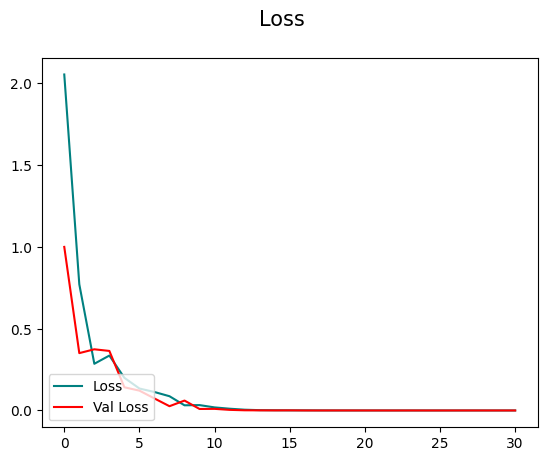

In [36]:
fig= plt.figure()
plt.plot(history.history['loss'], color='teal', label='Loss')
plt.plot(history.history['val_loss'], color='red', label='Val Loss')
fig.suptitle('Loss', fontsize=15)
plt.legend(loc='lower left')
plt.show()

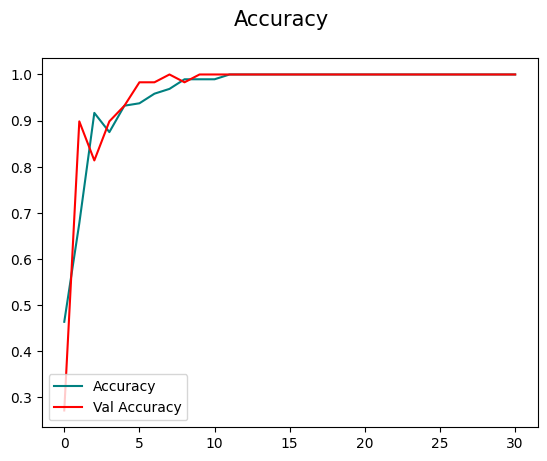

In [37]:
fig= plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='Accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='Val Accuracy')
fig.suptitle('Accuracy', fontsize=15)
plt.legend(loc='lower left')
plt.show()

In [38]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
pr = Precision()
re = Recall()
ca = CategoricalAccuracy()

In [39]:
len(test)

3

In [40]:
for batch in  test.as_numpy_iterator():
    X, y = batch
    yhat= model.predict(X)
    y = tf.one_hot(y, depth=3) #apply one hot encoding so that only one column has a value of 1 and the rest is 0
    pr.update_state(y,yhat)
    re.update_state(y,yhat)
    ca.update_state(y,yhat)    

1/1 [==============================] - 0s 227ms/step


In [41]:
print(y.shape,yhat.shape)

(2, 3) (2, 3)


In [42]:
print(pr.result().numpy(),re.result().numpy(),ca.result().numpy())

0.92424244 0.92424244 0.92424244


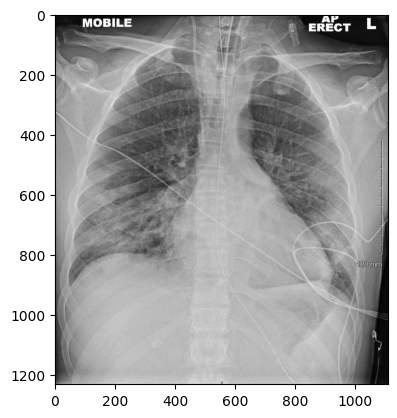

In [43]:
img = cv2.imread(r"test\\Covid19\\COVID (1).jpg",cv2.IMREAD_GRAYSCALE)
#plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.imshow(img,cmap='gray')
plt.show()

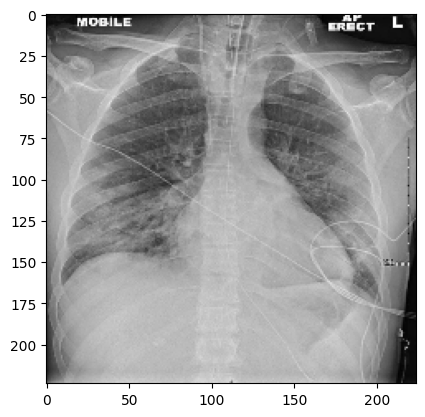

In [44]:
resize= cv2.resize(img, (224,224))
plt.imshow(resize,cmap='gray')
plt.show()

In [45]:
resize=np.expand_dims(resize,0)

In [46]:
resize = np.expand_dims(resize, axis=-1)

In [47]:
resize=resize/255.0

In [48]:
print(resize.shape)  # Should be something like (1, 224, 224, 1)

(1, 224, 224, 1)


In [49]:
yhat_test=model.predict(resize)

1/1 [==============================] - 0s 170ms/step


In [50]:
yhat_test

array([[1.0000000e+00, 8.5332060e-18, 1.9225432e-14]], dtype=float32)

In [51]:
pred_class = np.argmax(yhat_test, axis=1)
if pred_class[0]==0:
    print('Predicted class is Coronavirus.')
elif pred_class[0]==1:
    print('Predicted class is Normal.')
else: 
    print('Predicted class is Viral Pneumonia.')

Predicted class is Coronavirus.


In [52]:
pred_class[0]

0

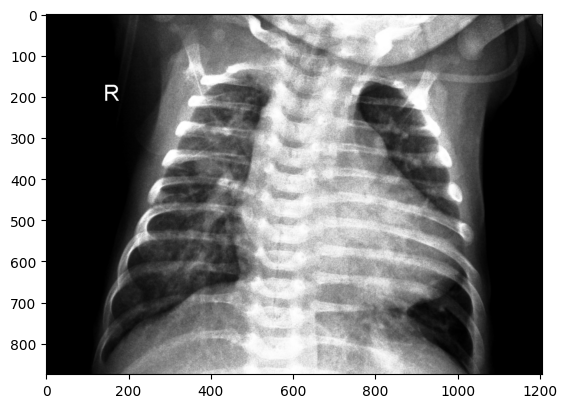

In [53]:
img = cv2.imread(r"test/Viral_Pneumonia/VP (19).jpeg",cv2.IMREAD_GRAYSCALE)
#plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.imshow(img,cmap='gray')
plt.show()

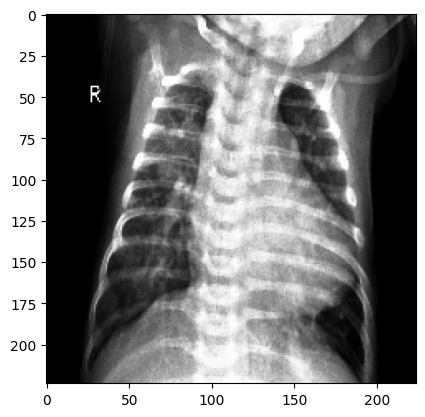

In [54]:
resize= cv2.resize(img, (224,224))
plt.imshow(resize,cmap='gray')
plt.show()

In [55]:
resize=np.expand_dims(resize,0)

In [56]:
resize = np.expand_dims(resize, axis=-1)

In [57]:
resize=resize/255.0

In [58]:
print(resize.shape)  # Should be something like (1, 224, 224, 1)

(1, 224, 224, 1)


In [59]:
yhat_test=model.predict(resize)

1/1 [==============================] - 0s 20ms/step


In [60]:
yhat_test

array([[3.5183653e-08, 6.2792600e-07, 9.9999928e-01]], dtype=float32)

In [61]:
pred_class = np.argmax(yhat_test, axis=1)
if pred_class[0]==0:
    print('Predicted class is Coronavirus.')
elif pred_class[0]==1:
    print('Predicted class is Normal.')
else: 
    print('Predicted class is Viral Pneumonia.')

Predicted class is Viral Pneumonia.


In [62]:
pred_class[0]

2

In [63]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','lung_disease_identification1.h5'))